In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("Credit_Card_Applications.csv")

In [3]:
dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [52]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

In [54]:
X_t=scaler.fit_transform(X)

In [55]:
from minisom import MiniSom

In [56]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0, learning_rate=0.5,decay_function=None,random_seed=1)

In [57]:
som.random_weights_init(X_t)

In [58]:
som.train_random(data=X_t,num_iteration=100)

In [59]:
%matplotlib inline
from pylab import bone,pcolor,colorbar,plot,show

In [60]:
bone()

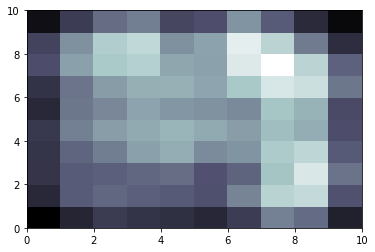

In [61]:
bone()
pcolor(som.distance_map().T)

In [62]:
som.distance_map().T


array([[ 0.08316308,  0.23587808,  0.32314534,  0.29636999,  0.28149728,
         0.24505717,  0.33280962,  0.56110493,  0.49165871,  0.22003323],
       [ 0.25128206,  0.4468451 ,  0.4808473 ,  0.45785513,  0.44486043,
         0.40726244,  0.5689383 ,  0.81554431,  0.84377691,  0.409899  ],
       [ 0.29820941,  0.445805  ,  0.45856594,  0.48329277,  0.49920121,
         0.41570837,  0.47013808,  0.75729657,  0.89962618,  0.51851441],
       [ 0.30458045,  0.47474966,  0.54624022,  0.65055698,  0.69170855,
         0.58909802,  0.61577772,  0.78452143,  0.83041242,  0.4425206 ],
       [ 0.31320346,  0.5592192 ,  0.64280774,  0.67921263,  0.71472141,
         0.67816161,  0.6449292 ,  0.73917269,  0.69029676,  0.40053763],
       [ 0.24807427,  0.52761697,  0.5802237 ,  0.66318344,  0.62210994,
         0.60937953,  0.58550742,  0.76716931,  0.70806017,  0.38757957],
       [ 0.29317868,  0.52279858,  0.64042553,  0.69757029,  0.70274323,
         0.666415  ,  0.77173592,  0.89570337

In [63]:
markers=['o','s']
colors=['r', 'g']

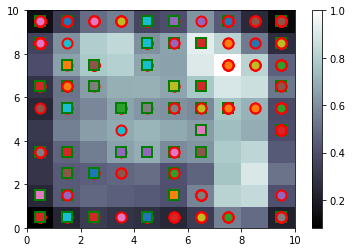

In [77]:
pcolor(som.distance_map().T)
colorbar()
for i,x in enumerate(X_t):
    w=som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor=None,markersize=10,markeredgewidth=2)

In [74]:
mappings=som.win_map(X_t)

In [78]:
frauds=mappings[(6,8)]

In [79]:
frauds_end=scaler.inverse_transform(frauds)

In [80]:
frauds_end

array([[  1.58033780e+07,   1.00000000e+00,   3.49200000e+01,
          5.00000000e+00,   2.00000000e+00,   1.40000000e+01,
          8.00000000e+00,   7.50000000e+00,   1.00000000e+00,
          1.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00100000e+03]])